#1 Introduccion
El siguiente cuaderno realiza una operación entre dos vectores de "precios de productos". El algoritmo lo que hace es calcular el porcentaje de aumento o descuento de un precio.

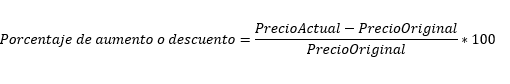

Para lograrlo, se generan dos vectores con N cantidad de precios(ingresadas por el usuario) con números aleatorios entre 50 y 100.

El objetivo es demostrar que utilizar el CPU y un paradigma secuencial no es una buena opción para procesar operaciones entre vectores cuando el tamaño del vector es muy grande.


---

#2 Armado del ambiente

No se necesita armado de ambiente



---

# Desarrollo

In [ ]:
# --------------------------------------------
#@title 3.1 Parámetros de ejecución { vertical-output: true }

cantidad_precios =   15000000#@param {type: "number"}

# --------------------------------------------

try:
  from datetime import datetime

  tiempo_total = datetime.now()

  import numpy

  # --------------------------------------------
  # Definición de función que transforma el tiempo en  milisegundos 
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  # --------------------------------------------
  # CPU - Defino la memoria de los vectores en cpu.

  #Pongo vectores de precios entre 50 y 100 para facilitar la lectura
  x_cpu = numpy.random.randint(50,100, cantidad_precios)
  x_cpu = x_cpu.astype( numpy.int32() )

  y_cpu = numpy.random.randint(50,100, cantidad_precios)
  y_cpu = y_cpu.astype( numpy.int32() )

  #Inicializo vector de resultados con 0 y lo copio al CPU
  precios = numpy.zeros(cantidad_precios)
  precios = precios.astype( numpy.float32() )

  # El resultado se escribe sobre el vector precios

  # --------------------------------------------
  # CPU - Realizo la función Axpy.

  tiempo_bucle = datetime.now()

  #calculo cuanto aumentó o bajó cada precio
  for index in range( 0, cantidad_precios ):
    precios[index] = ((y_cpu[index] - x_cpu[index]) / x_cpu[index]) * 100

  tiempo_bucle = datetime.now() - tiempo_bucle

  # --------------------------------------------


  # CPU - Informo el resultado.
  print( "------------------------------------")
  print( "X: " )
  print( x_cpu )
  print( "------------------------------------")
  print( "Y: " )
  print( y_cpu )
  print( "------------------------------------")
  print("\n\n")
  print( "Resultado de precios: " )
  print( precios )
  print("\n")
  print( "------------------------------------")

  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo Total: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo bucle: ", tiempo_en_ms( tiempo_bucle ), "[ms]" )
except Exception as exception:
  print("Ups, ocurrió una excepción: ")
  print(exception)


------------------------------------
X: 
[65 56 60 ... 50 86 75]
------------------------------------
Y: 
[62 97 96 ... 57 59 81]
------------------------------------



Resultado de precios: 
[ -4.6153846  73.21429    60.        ...  14.        -31.39535
   8.       ]


------------------------------------
Tiempo Total:  17736.289 [ms]
Tiempo bucle:  17350.869 [ms]


---

#4 Tabla de pasos
Tabla de pasos de la ejecución del programa:

 Procesador | Función | Detalle
------------|---------|----------
CPU      |  @param                | Lectura del tamaño de vectores de precios desde Colab.
CPU      |  import                | Importa los módulos para funcionar.
CPU      |  datetime.now()        | Toma el tiempo inicial.
CPU      |  numpy.random.randn( cantidad_precios ) | Inicializa los vectores x, y 
CPU      |  numpy.zeros( cantidad_precios ) | Inicializa el vector de resultado (precios) en 0
CPU      |  for...                | Realiza la suma de los vectores A y B, guardando el resultado en R. 
CPU      |  datetime.now()        | Toma el tiempo final.
CPU      |  print()               | Informa los resultados.

---

#5 Conclusión

Si bien el código es un poco mas simple que CUDA ya que no necesitamos utilizar la GPU ni copiar los vectores a la misma ni tenemos threads involucrados, esta solucion solo puede ser útil si nuestros vectores tienen tamaño pequeños (menor al millon), pues a partir del millon, la diferencia de tiempo de procesamiento comienza a ser notoria. Justamente a eso apunta HPC, a poder solucionar algoritmos complejos y costosos en tiempos humanamente perceptibles.

**Lecciones aprendidas**: Cuando el N del vector (tamaño) es muy grande, utilizar el CPU de forma secuencial puede traernos inconvenientes debido al tiempo de procesamiento que le lleva acceder posicion a posición del array y realizar el cálculo. Para esta caso encima son 3 arrays (precios originales, precios con valores cambiados y precios resultado).
**Sugerencias del algoritmo**: sería útil darle la posibilidad al usuario  de que cargue sus propios valores deprecios (por ejemplo desde un CSV) y probarlo con un archivo real y grande para darle una útilidad concreta.

---
# 6 Bibliografia

[1] MARKDOWN SYNTAX Colab: [PDF](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/markdown-cheatsheet-online.pdf)

[2] Introducción a Python: [Página Colab](https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb) 

[3] Documentacion randInt [Numpy randInt](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html) 

[4] Documentación PyCUDA: [WEB](https://documen.tician.de/pycuda/index.html)

[5] Repositorio de PyCUDA: [WEB](https://pypi.python.org/pypi/pycuda)

[6] Numpy ceros: [numpyZeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html?highlight=zeros#numpy.zeros)
